#Togo Analysis

#Summary statistics and Missing-value report

#Install necessary python libraries

In [1]:
%pip install panda
%pip install seaborn
%pip install matplotlib
%pip install numpy
%pip install scipy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/a1/18/0e835c3a557dc5faffc8f91092f62fc337c1dab1066715842e7a4b318ec4/setuptools-80.7.1-py3-none-any.whl.metadata
  Using cached setuptools-80.7.1-py3-none-any.whl.metadata (6.6 kB)
  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/8c/73/6ede2ec59bce19b3edf4209d70004253ec5f4e319f9a2e3f2f15601ed5f7/charset_normalizer-3.4.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for idna<4,>=2.5 from https://files.pythonhosted.org/packages/76/c6/c88e154df9c4e1a2a

##Read into df

In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/togo-dapaong_qc.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


#Summary

In [3]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


#list any columns with >5% null values

In [6]:
missing_values = df.isna().sum()
print(missing_values)

# Filter columns where missing values exceed 5% of the DataFrame length
threshold = 0.05 * len(df)
columns_with_many_nans = missing_values[missing_values > threshold].index

print(columns_with_many_nans)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Index(['Comments'], dtype='object')


#Outlier detection and Basic Cleaning\

In [7]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing_in_key_cols = df[key_columns].isna().sum()
print("Missing values in key columns:")
print(missing_in_key_cols)

Missing values in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


#Z score outlier detection and Flagging

In [12]:
from scipy.stats import zscore
import numpy as np

key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Recompute Z-scores in case data changed
z_scores = df[key_columns].apply(zscore)

# Flag rows with any absolute Z-score > 3
df['Outlier'] = (np.abs(z_scores) > 3).any(axis=1)

# Preview how many outliers were flagged
print(f"Total flagged outliers: {df['Outlier'].sum()}")

Total flagged outliers: 9251


#Clip negative irradance to 0

In [14]:
irradiance_cols = ['GHI', 'DNI', 'DHI']

# Replace negative values with 0
df[irradiance_cols] = df[irradiance_cols].clip(lower=0)

#Export data

In [16]:
df.to_csv("../data/cleaned/togo_clean.csv", index=False)

#Time Series Analysis

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

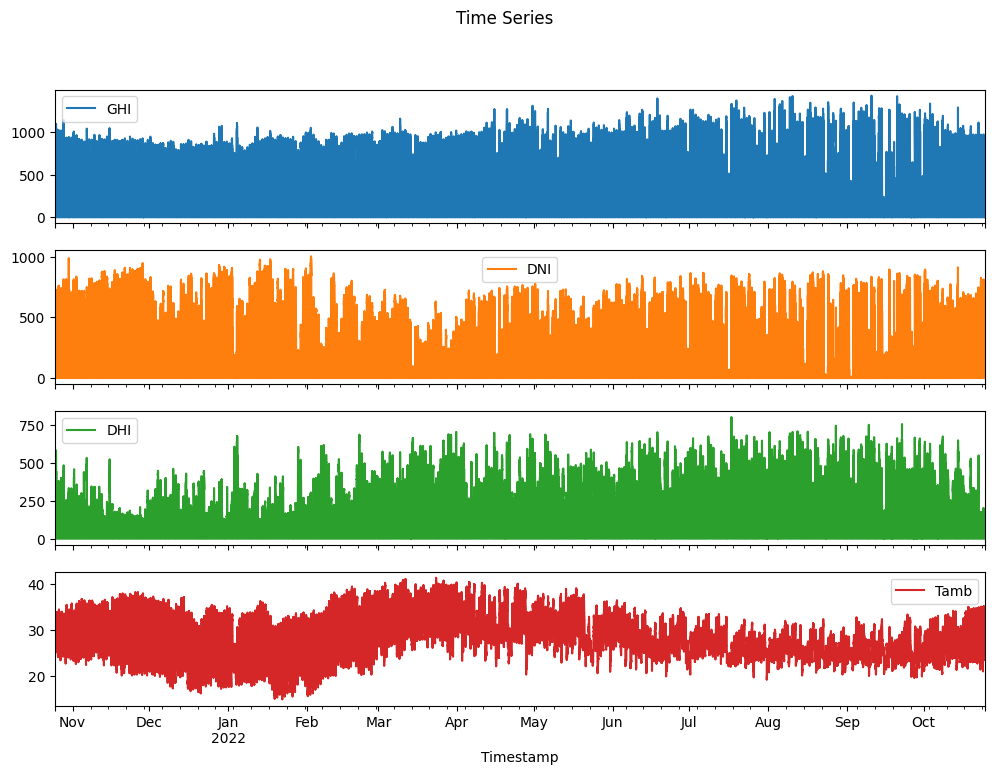

In [17]:
# Ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set as index (optional but helpful for time series)
df = df.set_index('Timestamp')

# Plot irradiance & temperature over time
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8), title='Time Series')

#Group by Month

<Axes: title={'center': 'Average by Hour'}, xlabel='hour'>

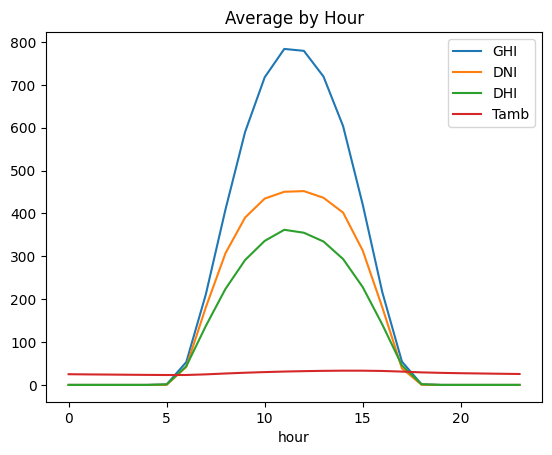

In [18]:
df['hour'] = df.index.hour
df['month'] = df.index.month

df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().plot(title='Average by Hour')

#Cleaning Impact

<Axes: title={'center': 'Effect of Cleaning'}, xlabel='Cleaning'>

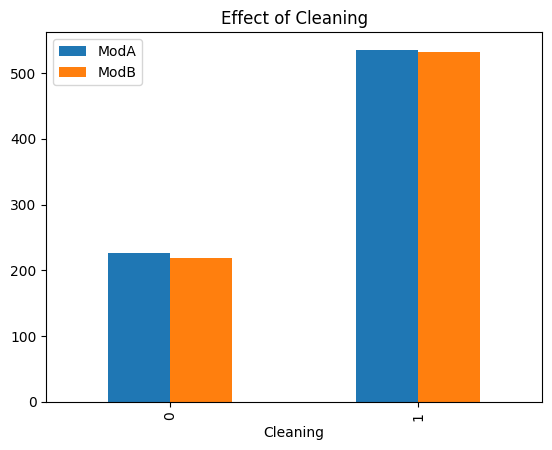

In [19]:
# Compare ModA and ModB before vs after cleaning
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', title='Effect of Cleaning')

#Correlation & Relationship Analysis

#Heatmap of correlations

Text(0.5, 1.0, 'Correlation Heatmap')

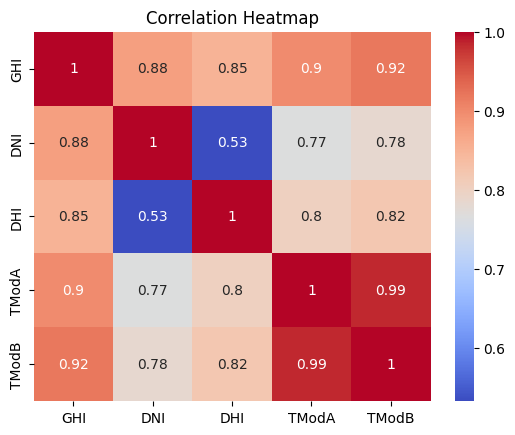

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

#Scatter plots

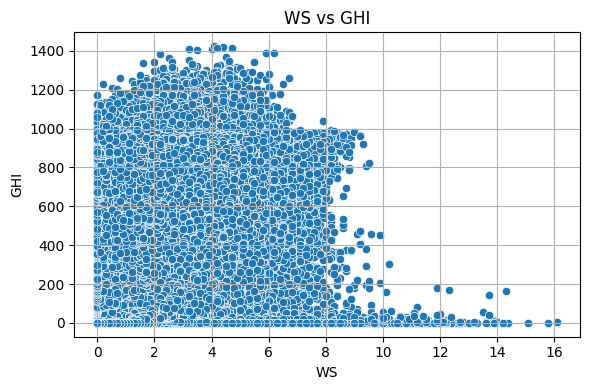

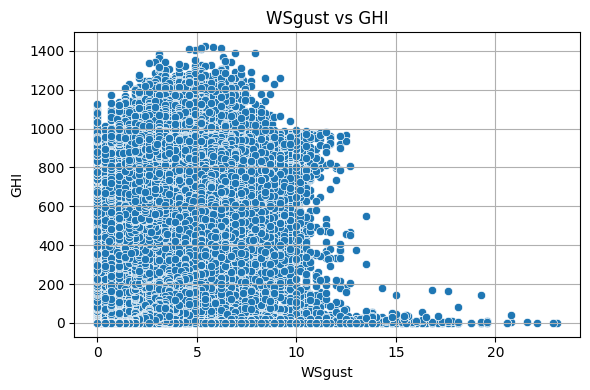

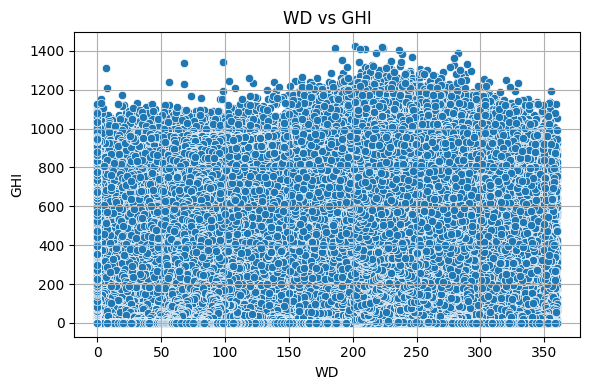

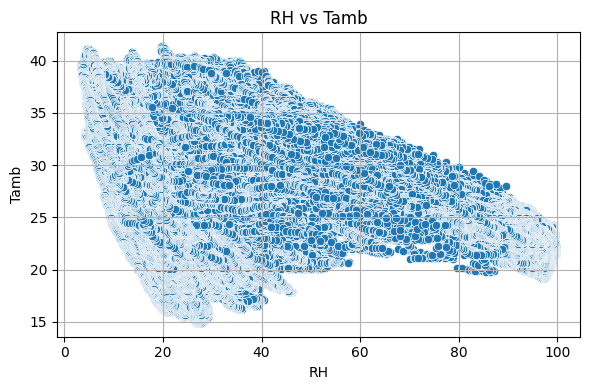

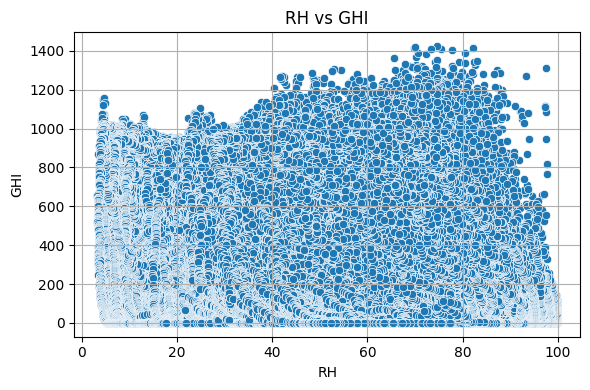

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define pairs of variables for x and y axes
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

# Loop over each pair and generate scatter plot
for x_var, y_var in scatter_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x_var, y=y_var)
    plt.title(f"{x_var} vs {y_var}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#Windrose